### 1. Imports

In [1]:
# Import libraries
import gym
import numpy as np
from stable_baselines.common.policies import MlpPolicy
from stable_baselines import PPO2, A2C
from matplotlib import pyplot as plt

The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.



c:\users\patri\documents\github\reinforcementlearninginventorymanagement\venv_37\lib\site-packages\stable_baselines\__init__.py:33: UserWarning: stable-baselines is in maintenance mode, please use [Stable-Baselines3 (SB3)](https://github.com/DLR-RM/stable-baselines3) for an up-to-date version. You can find a [migration guide](https://stable-baselines3.readthedocs.io/en/master/guide/migration.html) in SB3 documentation.
  "stable-baselines is in maintenance mode, please use [Stable-Baselines3 (SB3)](https://github.com/DLR-RM/stable-baselines3) for an up-to-date version. You can find a [migration guide](https://stable-baselines3.readthedocs.io/en/master/guide/migration.html) in SB3 documentation."


In [2]:
# Import classes
from rl_environment import Environment

### Environment creation

In [3]:
# Parameters
number_of_regional_warehouses = 3
max_inventory_amount_regional_warehouses = 40
max_inventory_amount_central_warehouse = 100
customer_demand_per_step = [1,2,3]  # List needs one entry per regional warehouse 
simulation_length = 30
lead_time = 2
shipment_amount = 8

In [4]:
env = Environment(number_of_regional_wh = number_of_regional_warehouses, 
                  rw_inventory_limit = max_inventory_amount_regional_warehouses, 
                  cw_inventory_limit = max_inventory_amount_central_warehouse,
                  demand = customer_demand_per_step,
                  sim_length = simulation_length,
                  lead_time = lead_time,
                  shipment_amount = shipment_amount)

env.print_environment_information()

Simulation created with the following parameters:
________________________________________________________________________________
Simulation | Round 1
-------------------
-> Active shipments:
No active shipments

-> Warehouses:
central_warehouse ; Inventory: 33
regional_warehouse_1 ; ID: 1 ; Inventory: 13 ; Demand: 1 ; Lost sales: 0
regional_warehouse_2 ; ID: 2 ; Inventory: 13 ; Demand: 2 ; Lost sales: 0
regional_warehouse_3 ; ID: 3 ; Inventory: 13 ; Demand: 3 ; Lost sales: 0
________________________________________________________________________________
Environment Information
-----------------------
Observation space: MultiDiscrete([41 41 41])
Action space: MultiDiscrete([2 2 2])
Starting state: [13 13 13]
________________________________________________________________________________


### RL model training

###### Model 1: PPO
Proximal Policy Optimization
https://openai.com/blog/openai-baselines-ppo/

In [5]:
ppo_model = PPO2(MlpPolicy, env, verbose=1)
ppo_model.learn(total_timesteps=100000)

Wrapping the env in a DummyVecEnv.




Instructions for updating:
Use keras.layers.flatten instead.
Instructions for updating:
Please use `layer.__call__` method instead.





Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



-------------------------------------
| approxkl           | 4.237986e-05 |
| clipfrac           | 0.0          |
| explained_variance | -2.33        |
| fps                | 322          |
| n_updates          | 1            |
| policy_entropy     | 2.0793986    |
| policy_loss        | -0.004279191 |
| serial_timesteps   | 128          |
| time_elapsed       | 0            |
| total_timesteps    | 128          |
| value_loss         | 0.09504859   |
-------------------------------------
--------------------------------------
| approxkl           | 1.7810198e-05 |
| clipfrac           | 0.0           |
| explained_variance | -1.76         |
| fps                | 1304          |
| n_updates          | 2             |

--------------------------------------
| approxkl           | 3.90091e-05   |
| clipfrac           | 0.0           |
| explained_variance | 0.303         |
| fps                | 1210          |
| n_updates          | 10            |
| policy_entropy     | 2.077275      |
| policy_loss        | -0.0024971415 |
| serial_timesteps   | 1280          |
| time_elapsed       | 1.39          |
| total_timesteps    | 1280          |
| value_loss         | 0.10795316    |
--------------------------------------
--------------------------------------
| approxkl           | 3.126336e-05  |
| clipfrac           | 0.0           |
| explained_variance | 0.428         |
| fps                | 1072          |
| n_updates          | 11            |
| policy_entropy     | 2.077322      |
| policy_loss        | -0.0017621376 |
| serial_timesteps   | 1408          |
| time_elapsed       | 1.49          |
| total_timesteps    | 1408          |
| value_loss         | 0.047407914   |
-------------------------

--------------------------------------
| approxkl           | 8.333939e-05  |
| clipfrac           | 0.0           |
| explained_variance | 0.485         |
| fps                | 1398          |
| n_updates          | 27            |
| policy_entropy     | 2.0617561     |
| policy_loss        | -0.0042356662 |
| serial_timesteps   | 3456          |
| time_elapsed       | 3.12          |
| total_timesteps    | 3456          |
| value_loss         | 0.01995118    |
--------------------------------------
--------------------------------------
| approxkl           | 0.00010502014 |
| clipfrac           | 0.0           |
| explained_variance | 0.46          |
| fps                | 1353          |
| n_updates          | 28            |
| policy_entropy     | 2.0628095     |
| policy_loss        | -0.006547546  |
| serial_timesteps   | 3584          |
| time_elapsed       | 3.21          |
| total_timesteps    | 3584          |
| value_loss         | 0.021083057   |
-------------------------

---------------------------------------
| approxkl           | 0.000117224095 |
| clipfrac           | 0.0            |
| explained_variance | 0.798          |
| fps                | 1441           |
| n_updates          | 44             |
| policy_entropy     | 2.0497065      |
| policy_loss        | -0.004980484   |
| serial_timesteps   | 5632           |
| time_elapsed       | 4.72           |
| total_timesteps    | 5632           |
| value_loss         | 0.013718108    |
---------------------------------------
--------------------------------------
| approxkl           | 0.00012233184 |
| clipfrac           | 0.0           |
| explained_variance | 0.0531        |
| fps                | 1441          |
| n_updates          | 45            |
| policy_entropy     | 2.0506525     |
| policy_loss        | -0.005661153  |
| serial_timesteps   | 5760          |
| time_elapsed       | 4.81          |
| total_timesteps    | 5760          |
| value_loss         | 0.06788226    |
------------

-------------------------------------
| approxkl           | 0.000312063  |
| clipfrac           | 0.0          |
| explained_variance | 0.696        |
| fps                | 1436         |
| n_updates          | 61           |
| policy_entropy     | 2.0056021    |
| policy_loss        | -0.010528988 |
| serial_timesteps   | 7808         |
| time_elapsed       | 6.28         |
| total_timesteps    | 7808         |
| value_loss         | 0.032002423  |
-------------------------------------
--------------------------------------
| approxkl           | 0.00034387485 |
| clipfrac           | 0.0           |
| explained_variance | 0.797         |
| fps                | 1435          |
| n_updates          | 62            |
| policy_entropy     | 2.0037575     |
| policy_loss        | -0.009433963  |
| serial_timesteps   | 7936          |
| time_elapsed       | 6.37          |
| total_timesteps    | 7936          |
| value_loss         | 0.010567648   |
--------------------------------------

--------------------------------------
| approxkl           | 0.00026255782 |
| clipfrac           | 0.0           |
| explained_variance | 0.657         |
| fps                | 1433          |
| n_updates          | 78            |
| policy_entropy     | 1.9415708     |
| policy_loss        | -0.009601075  |
| serial_timesteps   | 9984          |
| time_elapsed       | 7.84          |
| total_timesteps    | 9984          |
| value_loss         | 0.025735294   |
--------------------------------------
--------------------------------------
| approxkl           | 0.00012691629 |
| clipfrac           | 0.0           |
| explained_variance | 0.368         |
| fps                | 1339          |
| n_updates          | 79            |
| policy_entropy     | 1.9395376     |
| policy_loss        | -0.006864236  |
| serial_timesteps   | 10112         |
| time_elapsed       | 7.93          |
| total_timesteps    | 10112         |
| value_loss         | 0.06896941    |
-------------------------

--------------------------------------
| approxkl           | 0.00053132814 |
| clipfrac           | 0.0           |
| explained_variance | 0.736         |
| fps                | 1420          |
| n_updates          | 95            |
| policy_entropy     | 1.856261      |
| policy_loss        | -0.009794553  |
| serial_timesteps   | 12160         |
| time_elapsed       | 9.4           |
| total_timesteps    | 12160         |
| value_loss         | 0.050170533   |
--------------------------------------
-------------------------------------
| approxkl           | 0.0006108962 |
| clipfrac           | 0.0          |
| explained_variance | 0.451        |
| fps                | 1443         |
| n_updates          | 96           |
| policy_entropy     | 1.8191409    |
| policy_loss        | -0.009293997 |
| serial_timesteps   | 12288        |
| time_elapsed       | 9.5          |
| total_timesteps    | 12288        |
| value_loss         | 0.050194457  |
-------------------------------------

-------------------------------------
| approxkl           | 0.000316084  |
| clipfrac           | 0.0          |
| explained_variance | 0.417        |
| fps                | 1417         |
| n_updates          | 112          |
| policy_entropy     | 1.6403584    |
| policy_loss        | -0.008812092 |
| serial_timesteps   | 14336        |
| time_elapsed       | 11           |
| total_timesteps    | 14336        |
| value_loss         | 0.08803557   |
-------------------------------------
-------------------------------------
| approxkl           | 0.0005733381 |
| clipfrac           | 0.0          |
| explained_variance | 0.657        |
| fps                | 1436         |
| n_updates          | 113          |
| policy_entropy     | 1.6398888    |
| policy_loss        | -0.011143771 |
| serial_timesteps   | 14464        |
| time_elapsed       | 11           |
| total_timesteps    | 14464        |
| value_loss         | 0.079333276  |
-------------------------------------
------------

--------------------------------------
| approxkl           | 0.00060528825 |
| clipfrac           | 0.0           |
| explained_variance | 0.256         |
| fps                | 1423          |
| n_updates          | 129           |
| policy_entropy     | 1.4895928     |
| policy_loss        | -0.009887099  |
| serial_timesteps   | 16512         |
| time_elapsed       | 12.5          |
| total_timesteps    | 16512         |
| value_loss         | 0.31186217    |
--------------------------------------
-------------------------------------
| approxkl           | 0.0007763826 |
| clipfrac           | 0.001953125  |
| explained_variance | 0.428        |
| fps                | 1336         |
| n_updates          | 130          |
| policy_entropy     | 1.4089013    |
| policy_loss        | -0.014656013 |
| serial_timesteps   | 16640        |
| time_elapsed       | 12.6         |
| total_timesteps    | 16640        |
| value_loss         | 0.18324189   |
-------------------------------------

--------------------------------------
| approxkl           | 0.00054059806 |
| clipfrac           | 0.001953125   |
| explained_variance | 0.452         |
| fps                | 1383          |
| n_updates          | 146           |
| policy_entropy     | 1.2436116     |
| policy_loss        | -0.005959546  |
| serial_timesteps   | 18688         |
| time_elapsed       | 14.1          |
| total_timesteps    | 18688         |
| value_loss         | 0.19475171    |
--------------------------------------
--------------------------------------
| approxkl           | 0.00066145766 |
| clipfrac           | 0.00390625    |
| explained_variance | 0.355         |
| fps                | 1442          |
| n_updates          | 147           |
| policy_entropy     | 1.1875468     |
| policy_loss        | -0.009671911  |
| serial_timesteps   | 18816         |
| time_elapsed       | 14.1          |
| total_timesteps    | 18816         |
| value_loss         | 0.2783221     |
-------------------------

--------------------------------------
| approxkl           | 0.00028019733 |
| clipfrac           | 0.0           |
| explained_variance | 0.319         |
| fps                | 1456          |
| n_updates          | 163           |
| policy_entropy     | 1.0720946     |
| policy_loss        | -0.007271327  |
| serial_timesteps   | 20864         |
| time_elapsed       | 15.6          |
| total_timesteps    | 20864         |
| value_loss         | 0.37319684    |
--------------------------------------
--------------------------------------
| approxkl           | 0.00050994364 |
| clipfrac           | 0.0           |
| explained_variance | 0.13          |
| fps                | 1447          |
| n_updates          | 164           |
| policy_entropy     | 1.0425609     |
| policy_loss        | -0.007754608  |
| serial_timesteps   | 20992         |
| time_elapsed       | 15.7          |
| total_timesteps    | 20992         |
| value_loss         | 0.5737501     |
-------------------------

--------------------------------------
| approxkl           | 0.00056569383 |
| clipfrac           | 0.001953125   |
| explained_variance | 0.146         |
| fps                | 1409          |
| n_updates          | 180           |
| policy_entropy     | 1.003854      |
| policy_loss        | -0.008245184  |
| serial_timesteps   | 23040         |
| time_elapsed       | 17.1          |
| total_timesteps    | 23040         |
| value_loss         | 0.49332315    |
--------------------------------------
--------------------------------------
| approxkl           | 0.00024412246 |
| clipfrac           | 0.0           |
| explained_variance | 0.261         |
| fps                | 1436          |
| n_updates          | 181           |
| policy_entropy     | 1.027301      |
| policy_loss        | -0.0058455546 |
| serial_timesteps   | 23168         |
| time_elapsed       | 17.2          |
| total_timesteps    | 23168         |
| value_loss         | 0.35040492    |
-------------------------

--------------------------------------
| approxkl           | 0.00047838603 |
| clipfrac           | 0.00390625    |
| explained_variance | 0.459         |
| fps                | 1431          |
| n_updates          | 197           |
| policy_entropy     | 0.7333423     |
| policy_loss        | -0.005793199  |
| serial_timesteps   | 25216         |
| time_elapsed       | 18.7          |
| total_timesteps    | 25216         |
| value_loss         | 0.38842288    |
--------------------------------------
--------------------------------------
| approxkl           | 0.00025025263 |
| clipfrac           | 0.0           |
| explained_variance | 0.34          |
| fps                | 1438          |
| n_updates          | 198           |
| policy_entropy     | 0.7345067     |
| policy_loss        | -0.003941594  |
| serial_timesteps   | 25344         |
| time_elapsed       | 18.8          |
| total_timesteps    | 25344         |
| value_loss         | 0.8744346     |
-------------------------

-------------------------------------
| approxkl           | 0.0009360062 |
| clipfrac           | 0.005859375  |
| explained_variance | 0.489        |
| fps                | 1433         |
| n_updates          | 214          |
| policy_entropy     | 0.8632063    |
| policy_loss        | -0.012025343 |
| serial_timesteps   | 27392        |
| time_elapsed       | 20.2         |
| total_timesteps    | 27392        |
| value_loss         | 0.5738514    |
-------------------------------------
--------------------------------------
| approxkl           | 0.00061157974 |
| clipfrac           | 0.005859375   |
| explained_variance | 0.351         |
| fps                | 1430          |
| n_updates          | 215           |
| policy_entropy     | 0.8128055     |
| policy_loss        | -0.0075473245 |
| serial_timesteps   | 27520         |
| time_elapsed       | 20.3          |
| total_timesteps    | 27520         |
| value_loss         | 0.47090557    |
--------------------------------------

-------------------------------------
| approxkl           | 0.0005807974 |
| clipfrac           | 0.00390625   |
| explained_variance | 0.343        |
| fps                | 1450         |
| n_updates          | 231          |
| policy_entropy     | 0.7505045    |
| policy_loss        | -0.005940755 |
| serial_timesteps   | 29568        |
| time_elapsed       | 21.8         |
| total_timesteps    | 29568        |
| value_loss         | 0.4021799    |
-------------------------------------
--------------------------------------
| approxkl           | 0.0010010832  |
| clipfrac           | 0.001953125   |
| explained_variance | 0.277         |
| fps                | 1409          |
| n_updates          | 232           |
| policy_entropy     | 0.734694      |
| policy_loss        | -0.0067769163 |
| serial_timesteps   | 29696         |
| time_elapsed       | 21.8          |
| total_timesteps    | 29696         |
| value_loss         | 0.5957144     |
--------------------------------------

--------------------------------------
| approxkl           | 0.00041171128 |
| clipfrac           | 0.00390625    |
| explained_variance | 0.166         |
| fps                | 1430          |
| n_updates          | 248           |
| policy_entropy     | 0.6472528     |
| policy_loss        | -0.005665559  |
| serial_timesteps   | 31744         |
| time_elapsed       | 23.3          |
| total_timesteps    | 31744         |
| value_loss         | 0.8895131     |
--------------------------------------
-------------------------------------
| approxkl           | 0.0006998376 |
| clipfrac           | 0.0078125    |
| explained_variance | 0.405        |
| fps                | 1418         |
| n_updates          | 249          |
| policy_entropy     | 0.7294298    |
| policy_loss        | -0.009564724 |
| serial_timesteps   | 31872        |
| time_elapsed       | 23.4         |
| total_timesteps    | 31872        |
| value_loss         | 0.36581388   |
-------------------------------------

-------------------------------------
| approxkl           | 0.0007783185 |
| clipfrac           | 0.01171875   |
| explained_variance | 0.505        |
| fps                | 1312         |
| n_updates          | 265          |
| policy_entropy     | 0.5762286    |
| policy_loss        | -0.007356312 |
| serial_timesteps   | 33920        |
| time_elapsed       | 24.9         |
| total_timesteps    | 33920        |
| value_loss         | 0.6232222    |
-------------------------------------
--------------------------------------
| approxkl           | 0.00068873394 |
| clipfrac           | 0.005859375   |
| explained_variance | 0.161         |
| fps                | 1319          |
| n_updates          | 266           |
| policy_entropy     | 0.55196357    |
| policy_loss        | -0.0052402914 |
| serial_timesteps   | 34048         |
| time_elapsed       | 25            |
| total_timesteps    | 34048         |
| value_loss         | 0.8375546     |
--------------------------------------

--------------------------------------
| approxkl           | 0.0005568291  |
| clipfrac           | 0.001953125   |
| explained_variance | 0.452         |
| fps                | 1318          |
| n_updates          | 282           |
| policy_entropy     | 0.57445973    |
| policy_loss        | -0.0067147566 |
| serial_timesteps   | 36096         |
| time_elapsed       | 26.5          |
| total_timesteps    | 36096         |
| value_loss         | 0.7159293     |
--------------------------------------
-------------------------------------
| approxkl           | 0.0010654437 |
| clipfrac           | 0.009765625  |
| explained_variance | -0.0443      |
| fps                | 1391         |
| n_updates          | 283          |
| policy_entropy     | 0.6252446    |
| policy_loss        | -0.007613802 |
| serial_timesteps   | 36224        |
| time_elapsed       | 26.6         |
| total_timesteps    | 36224        |
| value_loss         | 2.5681612    |
-------------------------------------

--------------------------------------
| approxkl           | 0.00059780414 |
| clipfrac           | 0.005859375   |
| explained_variance | 0.29          |
| fps                | 1357          |
| n_updates          | 299           |
| policy_entropy     | 0.49917588    |
| policy_loss        | -0.0057795276 |
| serial_timesteps   | 38272         |
| time_elapsed       | 28.1          |
| total_timesteps    | 38272         |
| value_loss         | 0.5546276     |
--------------------------------------
-------------------------------------
| approxkl           | 0.0004874453 |
| clipfrac           | 0.001953125  |
| explained_variance | 0.431        |
| fps                | 1270         |
| n_updates          | 300          |
| policy_entropy     | 0.59118503   |
| policy_loss        | -0.008163013 |
| serial_timesteps   | 38400        |
| time_elapsed       | 28.2         |
| total_timesteps    | 38400        |
| value_loss         | 0.46539086   |
-------------------------------------

--------------------------------------
| approxkl           | 0.00054254057 |
| clipfrac           | 0.0           |
| explained_variance | 0.144         |
| fps                | 1323          |
| n_updates          | 316           |
| policy_entropy     | 0.54208046    |
| policy_loss        | -0.004360863  |
| serial_timesteps   | 40448         |
| time_elapsed       | 29.7          |
| total_timesteps    | 40448         |
| value_loss         | 0.88881046    |
--------------------------------------
--------------------------------------
| approxkl           | 0.00042334467 |
| clipfrac           | 0.00390625    |
| explained_variance | 0.0845        |
| fps                | 1340          |
| n_updates          | 317           |
| policy_entropy     | 0.46500042    |
| policy_loss        | -0.003680808  |
| serial_timesteps   | 40576         |
| time_elapsed       | 29.8          |
| total_timesteps    | 40576         |
| value_loss         | 0.68172646    |
-------------------------

-------------------------------------
| approxkl           | 0.0006370448 |
| clipfrac           | 0.0078125    |
| explained_variance | 0.307        |
| fps                | 1390         |
| n_updates          | 333          |
| policy_entropy     | 0.6147345    |
| policy_loss        | -0.006742232 |
| serial_timesteps   | 42624        |
| time_elapsed       | 31.3         |
| total_timesteps    | 42624        |
| value_loss         | 0.6486243    |
-------------------------------------
--------------------------------------
| approxkl           | 0.0011952611  |
| clipfrac           | 0.025390625   |
| explained_variance | 0.338         |
| fps                | 1408          |
| n_updates          | 334           |
| policy_entropy     | 0.41731238    |
| policy_loss        | -0.0051838756 |
| serial_timesteps   | 42752         |
| time_elapsed       | 31.4          |
| total_timesteps    | 42752         |
| value_loss         | 0.67178524    |
--------------------------------------

--------------------------------------
| approxkl           | 0.0009843358  |
| clipfrac           | 0.0078125     |
| explained_variance | 0.255         |
| fps                | 1437          |
| n_updates          | 350           |
| policy_entropy     | 0.42611474    |
| policy_loss        | -0.0071211257 |
| serial_timesteps   | 44800         |
| time_elapsed       | 32.8          |
| total_timesteps    | 44800         |
| value_loss         | 0.74649364    |
--------------------------------------
--------------------------------------
| approxkl           | 0.00019041437 |
| clipfrac           | 0.001953125   |
| explained_variance | 0.24          |
| fps                | 1367          |
| n_updates          | 351           |
| policy_entropy     | 0.31442213    |
| policy_loss        | -0.0012931181 |
| serial_timesteps   | 44928         |
| time_elapsed       | 32.9          |
| total_timesteps    | 44928         |
| value_loss         | 0.8630125     |
-------------------------

--------------------------------------
| approxkl           | 0.00049753825 |
| clipfrac           | 0.00390625    |
| explained_variance | 0.437         |
| fps                | 1341          |
| n_updates          | 367           |
| policy_entropy     | 0.2665426     |
| policy_loss        | -0.005404266  |
| serial_timesteps   | 46976         |
| time_elapsed       | 34.5          |
| total_timesteps    | 46976         |
| value_loss         | 1.2085464     |
--------------------------------------
--------------------------------------
| approxkl           | 0.00014991354 |
| clipfrac           | 0.00390625    |
| explained_variance | 0.117         |
| fps                | 1331          |
| n_updates          | 368           |
| policy_entropy     | 0.17361559    |
| policy_loss        | -0.0020117192 |
| serial_timesteps   | 47104         |
| time_elapsed       | 34.6          |
| total_timesteps    | 47104         |
| value_loss         | 1.0750742     |
-------------------------

--------------------------------------
| approxkl           | 5.22846e-05   |
| clipfrac           | 0.001953125   |
| explained_variance | 0.112         |
| fps                | 1281          |
| n_updates          | 384           |
| policy_entropy     | 0.13556255    |
| policy_loss        | -0.0009808252 |
| serial_timesteps   | 49152         |
| time_elapsed       | 36.1          |
| total_timesteps    | 49152         |
| value_loss         | 0.96541405    |
--------------------------------------
--------------------------------------
| approxkl           | 0.00026146983 |
| clipfrac           | 0.001953125   |
| explained_variance | 0.364         |
| fps                | 1384          |
| n_updates          | 385           |
| policy_entropy     | 0.21482414    |
| policy_loss        | -0.0032876567 |
| serial_timesteps   | 49280         |
| time_elapsed       | 36.2          |
| total_timesteps    | 49280         |
| value_loss         | 0.6917674     |
-------------------------

--------------------------------------
| approxkl           | 8.043233e-05  |
| clipfrac           | 0.001953125   |
| explained_variance | 0.161         |
| fps                | 1377          |
| n_updates          | 401           |
| policy_entropy     | 0.10855076    |
| policy_loss        | -0.0013055843 |
| serial_timesteps   | 51328         |
| time_elapsed       | 37.7          |
| total_timesteps    | 51328         |
| value_loss         | 1.1809946     |
--------------------------------------
--------------------------------------
| approxkl           | 1.6743246e-07 |
| clipfrac           | 0.0           |
| explained_variance | 0.153         |
| fps                | 1374          |
| n_updates          | 402           |
| policy_entropy     | 0.09603503    |
| policy_loss        | -2.844492e-05 |
| serial_timesteps   | 51456         |
| time_elapsed       | 37.8          |
| total_timesteps    | 51456         |
| value_loss         | 1.1200626     |
-------------------------

--------------------------------------
| approxkl           | 0.00012706277 |
| clipfrac           | 0.001953125   |
| explained_variance | 0.12          |
| fps                | 1343          |
| n_updates          | 418           |
| policy_entropy     | 0.10325094    |
| policy_loss        | -0.0008248098 |
| serial_timesteps   | 53504         |
| time_elapsed       | 39.4          |
| total_timesteps    | 53504         |
| value_loss         | 1.0200771     |
--------------------------------------
--------------------------------------
| approxkl           | 0.0003371135  |
| clipfrac           | 0.00390625    |
| explained_variance | 0.218         |
| fps                | 1385          |
| n_updates          | 419           |
| policy_entropy     | 0.12468557    |
| policy_loss        | -0.0027014646 |
| serial_timesteps   | 53632         |
| time_elapsed       | 39.5          |
| total_timesteps    | 53632         |
| value_loss         | 0.9897263     |
-------------------------

--------------------------------------
| approxkl           | 0.00013819867 |
| clipfrac           | 0.0           |
| explained_variance | 0.309         |
| fps                | 1374          |
| n_updates          | 435           |
| policy_entropy     | 0.12795483    |
| policy_loss        | -0.0017023603 |
| serial_timesteps   | 55680         |
| time_elapsed       | 41            |
| total_timesteps    | 55680         |
| value_loss         | 1.0385056     |
--------------------------------------
--------------------------------------
| approxkl           | 0.0005706689  |
| clipfrac           | 0.009765625   |
| explained_variance | 0.243         |
| fps                | 1345          |
| n_updates          | 436           |
| policy_entropy     | 0.13740174    |
| policy_loss        | -0.0047444724 |
| serial_timesteps   | 55808         |
| time_elapsed       | 41            |
| total_timesteps    | 55808         |
| value_loss         | 0.95274353    |
-------------------------

--------------------------------------
| approxkl           | 0.00037141374 |
| clipfrac           | 0.005859375   |
| explained_variance | 0.208         |
| fps                | 1366          |
| n_updates          | 452           |
| policy_entropy     | 0.10168655    |
| policy_loss        | -0.0034501634 |
| serial_timesteps   | 57856         |
| time_elapsed       | 42.6          |
| total_timesteps    | 57856         |
| value_loss         | 0.9301423     |
--------------------------------------
---------------------------------------
| approxkl           | 2.6312975e-07  |
| clipfrac           | 0.0            |
| explained_variance | 0.142          |
| fps                | 1295           |
| n_updates          | 453            |
| policy_entropy     | 0.086374156    |
| policy_loss        | -1.4870893e-05 |
| serial_timesteps   | 57984          |
| time_elapsed       | 42.7           |
| total_timesteps    | 57984          |
| value_loss         | 1.0411543      |
-------------

--------------------------------------
| approxkl           | 0.00074753945 |
| clipfrac           | 0.009765625   |
| explained_variance | 0.355         |
| fps                | 1393          |
| n_updates          | 469           |
| policy_entropy     | 0.10415217    |
| policy_loss        | -0.0037469906 |
| serial_timesteps   | 60032         |
| time_elapsed       | 44.2          |
| total_timesteps    | 60032         |
| value_loss         | 0.9031598     |
--------------------------------------
--------------------------------------
| approxkl           | 0.00023072802 |
| clipfrac           | 0.00390625    |
| explained_variance | 0.186         |
| fps                | 1327          |
| n_updates          | 470           |
| policy_entropy     | 0.07476609    |
| policy_loss        | -0.0014675234 |
| serial_timesteps   | 60160         |
| time_elapsed       | 44.3          |
| total_timesteps    | 60160         |
| value_loss         | 0.9545987     |
-------------------------

--------------------------------------
| approxkl           | 0.00023970832 |
| clipfrac           | 0.001953125   |
| explained_variance | 0.159         |
| fps                | 1344          |
| n_updates          | 486           |
| policy_entropy     | 0.09508294    |
| policy_loss        | -0.0026499904 |
| serial_timesteps   | 62208         |
| time_elapsed       | 45.8          |
| total_timesteps    | 62208         |
| value_loss         | 0.99690855    |
--------------------------------------
--------------------------------------
| approxkl           | 4.083869e-07  |
| clipfrac           | 0.0           |
| explained_variance | 0.148         |
| fps                | 1300          |
| n_updates          | 487           |
| policy_entropy     | 0.057998016   |
| policy_loss        | 3.4610275e-06 |
| serial_timesteps   | 62336         |
| time_elapsed       | 45.9          |
| total_timesteps    | 62336         |
| value_loss         | 1.1338804     |
-------------------------

--------------------------------------
| approxkl           | 1.0430269e-06 |
| clipfrac           | 0.0           |
| explained_variance | 0.153         |
| fps                | 1384          |
| n_updates          | 503           |
| policy_entropy     | 0.09446274    |
| policy_loss        | -9.235053e-06 |
| serial_timesteps   | 64384         |
| time_elapsed       | 47.4          |
| total_timesteps    | 64384         |
| value_loss         | 1.1801807     |
--------------------------------------
--------------------------------------
| approxkl           | 0.00012577961 |
| clipfrac           | 0.00390625    |
| explained_variance | 0.2           |
| fps                | 1411          |
| n_updates          | 504           |
| policy_entropy     | 0.11422076    |
| policy_loss        | -0.0008180208 |
| serial_timesteps   | 64512         |
| time_elapsed       | 47.5          |
| total_timesteps    | 64512         |
| value_loss         | 0.96567035    |
-------------------------

--------------------------------------
| approxkl           | 0.00085588335 |
| clipfrac           | 0.015625      |
| explained_variance | 0.192         |
| fps                | 1439          |
| n_updates          | 520           |
| policy_entropy     | 0.086017944   |
| policy_loss        | -0.0028915773 |
| serial_timesteps   | 66560         |
| time_elapsed       | 49.3          |
| total_timesteps    | 66560         |
| value_loss         | 0.8775488     |
--------------------------------------
--------------------------------------
| approxkl           | 0.00013671143 |
| clipfrac           | 0.001953125   |
| explained_variance | 0.202         |
| fps                | 1403          |
| n_updates          | 521           |
| policy_entropy     | 0.08291449    |
| policy_loss        | -0.0006360288 |
| serial_timesteps   | 66688         |
| time_elapsed       | 49.4          |
| total_timesteps    | 66688         |
| value_loss         | 0.95495826    |
-------------------------

--------------------------------------
| approxkl           | 2.4210778e-09 |
| clipfrac           | 0.0           |
| explained_variance | 0.171         |
| fps                | 1235          |
| n_updates          | 537           |
| policy_entropy     | 0.048118252   |
| policy_loss        | -6.451737e-07 |
| serial_timesteps   | 68736         |
| time_elapsed       | 50.9          |
| total_timesteps    | 68736         |
| value_loss         | 1.1320214     |
--------------------------------------
---------------------------------------
| approxkl           | 2.0040967e-09  |
| clipfrac           | 0.0            |
| explained_variance | 0.156          |
| fps                | 1438           |
| n_updates          | 538            |
| policy_entropy     | 0.048356667    |
| policy_loss        | -1.3178214e-07 |
| serial_timesteps   | 68864          |
| time_elapsed       | 51             |
| total_timesteps    | 68864          |
| value_loss         | 1.0622914      |
-------------

---------------------------------------
| approxkl           | 4.0222116e-07  |
| clipfrac           | 0.0            |
| explained_variance | 0.143          |
| fps                | 1377           |
| n_updates          | 554            |
| policy_entropy     | 0.0606506      |
| policy_loss        | -2.4790643e-06 |
| serial_timesteps   | 70912          |
| time_elapsed       | 52.5           |
| total_timesteps    | 70912          |
| value_loss         | 1.165757       |
---------------------------------------
--------------------------------------
| approxkl           | 0.00013595702 |
| clipfrac           | 0.001953125   |
| explained_variance | 0.162         |
| fps                | 1445          |
| n_updates          | 555           |
| policy_entropy     | 0.06031223    |
| policy_loss        | -0.0016062623 |
| serial_timesteps   | 71040         |
| time_elapsed       | 52.6          |
| total_timesteps    | 71040         |
| value_loss         | 1.206852      |
------------

---------------------------------------
| approxkl           | 2.0753396e-05  |
| clipfrac           | 0.0            |
| explained_variance | 0.165          |
| fps                | 1278           |
| n_updates          | 571            |
| policy_entropy     | 0.08180272     |
| policy_loss        | 1.48443505e-05 |
| serial_timesteps   | 73088          |
| time_elapsed       | 54.3           |
| total_timesteps    | 73088          |
| value_loss         | 1.004373       |
---------------------------------------
--------------------------------------
| approxkl           | 3.541636e-07  |
| clipfrac           | 0.0           |
| explained_variance | 0.153         |
| fps                | 1368          |
| n_updates          | 572           |
| policy_entropy     | 0.07966603    |
| policy_loss        | 4.4010114e-05 |
| serial_timesteps   | 73216         |
| time_elapsed       | 54.4          |
| total_timesteps    | 73216         |
| value_loss         | 0.99590164    |
------------

---------------------------------------
| approxkl           | 0.0001568678   |
| clipfrac           | 0.0            |
| explained_variance | 0.115          |
| fps                | 1404           |
| n_updates          | 588            |
| policy_entropy     | 0.08805872     |
| policy_loss        | -0.00042653852 |
| serial_timesteps   | 75264          |
| time_elapsed       | 55.9           |
| total_timesteps    | 75264          |
| value_loss         | 1.1705552      |
---------------------------------------
--------------------------------------
| approxkl           | 0.00038713665 |
| clipfrac           | 0.005859375   |
| explained_variance | 0.161         |
| fps                | 1404          |
| n_updates          | 589           |
| policy_entropy     | 0.07395337    |
| policy_loss        | -0.0026041588 |
| serial_timesteps   | 75392         |
| time_elapsed       | 56            |
| total_timesteps    | 75392         |
| value_loss         | 1.163598      |
------------

--------------------------------------
| approxkl           | 0.00070042413 |
| clipfrac           | 0.0078125     |
| explained_variance | 0.00123       |
| fps                | 1373          |
| n_updates          | 605           |
| policy_entropy     | 0.1216975     |
| policy_loss        | -0.0039694533 |
| serial_timesteps   | 77440         |
| time_elapsed       | 57.5          |
| total_timesteps    | 77440         |
| value_loss         | 1.0627483     |
--------------------------------------
--------------------------------------
| approxkl           | 1.8499672e-05 |
| clipfrac           | 0.0           |
| explained_variance | 0.121         |
| fps                | 1415          |
| n_updates          | 606           |
| policy_entropy     | 0.09941155    |
| policy_loss        | 0.00018390396 |
| serial_timesteps   | 77568         |
| time_elapsed       | 57.6          |
| total_timesteps    | 77568         |
| value_loss         | 1.0009652     |
-------------------------

--------------------------------------
| approxkl           | 1.2611945e-06 |
| clipfrac           | 0.0           |
| explained_variance | 0.215         |
| fps                | 1394          |
| n_updates          | 622           |
| policy_entropy     | 0.0760967     |
| policy_loss        | 9.323831e-05  |
| serial_timesteps   | 79616         |
| time_elapsed       | 59.1          |
| total_timesteps    | 79616         |
| value_loss         | 1.082199      |
--------------------------------------
------------------------------------
| approxkl           | 6.72068e-05 |
| clipfrac           | 0.0         |
| explained_variance | 0.314       |
| fps                | 1353        |
| n_updates          | 623         |
| policy_entropy     | 0.09335652  |
| policy_loss        | -0.00145497 |
| serial_timesteps   | 79744       |
| time_elapsed       | 59.2        |
| total_timesteps    | 79744       |
| value_loss         | 1.3134956   |
------------------------------------
------------

-------------------------------------
| approxkl           | 0.0009239847 |
| clipfrac           | 0.009765625  |
| explained_variance | 0.12         |
| fps                | 1443         |
| n_updates          | 639          |
| policy_entropy     | 0.14197439   |
| policy_loss        | -0.003151352 |
| serial_timesteps   | 81792        |
| time_elapsed       | 60.6         |
| total_timesteps    | 81792        |
| value_loss         | 1.0315969    |
-------------------------------------
---------------------------------------
| approxkl           | 0.0005708125   |
| clipfrac           | 0.00390625     |
| explained_variance | 0.0959         |
| fps                | 1448           |
| n_updates          | 640            |
| policy_entropy     | 0.14023396     |
| policy_loss        | -0.00048823946 |
| serial_timesteps   | 81920          |
| time_elapsed       | 60.7           |
| total_timesteps    | 81920          |
| value_loss         | 1.0146697      |
--------------------------

--------------------------------------
| approxkl           | 0.0013264351  |
| clipfrac           | 0.015625      |
| explained_variance | 0.32          |
| fps                | 1345          |
| n_updates          | 656           |
| policy_entropy     | 0.16881356    |
| policy_loss        | -0.0008711304 |
| serial_timesteps   | 83968         |
| time_elapsed       | 62.2          |
| total_timesteps    | 83968         |
| value_loss         | 0.8276161     |
--------------------------------------
-------------------------------------
| approxkl           | 0.0014559156 |
| clipfrac           | 0.013671875  |
| explained_variance | 0.182        |
| fps                | 1423         |
| n_updates          | 657          |
| policy_entropy     | 0.19870956   |
| policy_loss        | -0.007876102 |
| serial_timesteps   | 84096        |
| time_elapsed       | 62.3         |
| total_timesteps    | 84096        |
| value_loss         | 0.8857748    |
-------------------------------------

-------------------------------------
| approxkl           | 0.002660624  |
| clipfrac           | 0.033203125  |
| explained_variance | 0.341        |
| fps                | 1430         |
| n_updates          | 673          |
| policy_entropy     | 0.18480934   |
| policy_loss        | -0.011987486 |
| serial_timesteps   | 86144        |
| time_elapsed       | 63.7         |
| total_timesteps    | 86144        |
| value_loss         | 0.8025019    |
-------------------------------------
--------------------------------------
| approxkl           | 0.00057831564 |
| clipfrac           | 0.005859375   |
| explained_variance | 0.171         |
| fps                | 1440          |
| n_updates          | 674           |
| policy_entropy     | 0.19064781    |
| policy_loss        | -0.0023348355 |
| serial_timesteps   | 86272         |
| time_elapsed       | 63.8          |
| total_timesteps    | 86272         |
| value_loss         | 1.0452391     |
--------------------------------------

--------------------------------------
| approxkl           | 0.00032652862 |
| clipfrac           | 0.0078125     |
| explained_variance | 0.285         |
| fps                | 1329          |
| n_updates          | 690           |
| policy_entropy     | 0.14592856    |
| policy_loss        | -0.001962149  |
| serial_timesteps   | 88320         |
| time_elapsed       | 65.3          |
| total_timesteps    | 88320         |
| value_loss         | 0.9135902     |
--------------------------------------
--------------------------------------
| approxkl           | 0.00069787866 |
| clipfrac           | 0.009765625   |
| explained_variance | 0.0622        |
| fps                | 1272          |
| n_updates          | 691           |
| policy_entropy     | 0.17243421    |
| policy_loss        | -0.0042634187 |
| serial_timesteps   | 88448         |
| time_elapsed       | 65.4          |
| total_timesteps    | 88448         |
| value_loss         | 0.9936477     |
-------------------------

--------------------------------------
| approxkl           | 0.00093064964 |
| clipfrac           | 0.01953125    |
| explained_variance | 0.285         |
| fps                | 1069          |
| n_updates          | 707           |
| policy_entropy     | 0.25550428    |
| policy_loss        | -0.007199468  |
| serial_timesteps   | 90496         |
| time_elapsed       | 67.4          |
| total_timesteps    | 90496         |
| value_loss         | 0.7891642     |
--------------------------------------
--------------------------------------
| approxkl           | 0.00061637774 |
| clipfrac           | 0.009765625   |
| explained_variance | 0.159         |
| fps                | 1034          |
| n_updates          | 708           |
| policy_entropy     | 0.20953637    |
| policy_loss        | -0.0039990847 |
| serial_timesteps   | 90624         |
| time_elapsed       | 67.6          |
| total_timesteps    | 90624         |
| value_loss         | 1.048874      |
-------------------------

---------------------------------------
| approxkl           | 0.00025733648  |
| clipfrac           | 0.0            |
| explained_variance | 0.302          |
| fps                | 763            |
| n_updates          | 724            |
| policy_entropy     | 0.22040294     |
| policy_loss        | -0.00055023073 |
| serial_timesteps   | 92672          |
| time_elapsed       | 69.9           |
| total_timesteps    | 92672          |
| value_loss         | 1.1032511      |
---------------------------------------
--------------------------------------
| approxkl           | 0.0009960146  |
| clipfrac           | 0.017578125   |
| explained_variance | 0.202         |
| fps                | 873           |
| n_updates          | 725           |
| policy_entropy     | 0.19526008    |
| policy_loss        | -0.0036431737 |
| serial_timesteps   | 92800         |
| time_elapsed       | 70.1          |
| total_timesteps    | 92800         |
| value_loss         | 1.1622388     |
------------

--------------------------------------
| approxkl           | 0.00050828943 |
| clipfrac           | 0.0078125     |
| explained_variance | 0.168         |
| fps                | 987           |
| n_updates          | 741           |
| policy_entropy     | 0.24955651    |
| policy_loss        | -0.0033194355 |
| serial_timesteps   | 94848         |
| time_elapsed       | 72.3          |
| total_timesteps    | 94848         |
| value_loss         | 1.0184771     |
--------------------------------------
-------------------------------------
| approxkl           | 0.0024550294 |
| clipfrac           | 0.0234375    |
| explained_variance | 0.355        |
| fps                | 1026         |
| n_updates          | 742          |
| policy_entropy     | 0.2873609    |
| policy_loss        | -0.010074059 |
| serial_timesteps   | 94976        |
| time_elapsed       | 72.4         |
| total_timesteps    | 94976        |
| value_loss         | 1.2137771    |
-------------------------------------

--------------------------------------
| approxkl           | 0.0006683975  |
| clipfrac           | 0.0078125     |
| explained_variance | 0.228         |
| fps                | 439           |
| n_updates          | 758           |
| policy_entropy     | 0.24925509    |
| policy_loss        | -0.0058964672 |
| serial_timesteps   | 97024         |
| time_elapsed       | 74.8          |
| total_timesteps    | 97024         |
| value_loss         | 1.9965317     |
--------------------------------------
--------------------------------------
| approxkl           | 0.0011848473  |
| clipfrac           | 0.01171875    |
| explained_variance | 0.198         |
| fps                | 891           |
| n_updates          | 759           |
| policy_entropy     | 0.23307215    |
| policy_loss        | -0.0050597424 |
| serial_timesteps   | 97152         |
| time_elapsed       | 75.1          |
| total_timesteps    | 97152         |
| value_loss         | 1.0420347     |
-------------------------

--------------------------------------
| approxkl           | 0.00075882423 |
| clipfrac           | 0.0078125     |
| explained_variance | 0.206         |
| fps                | 709           |
| n_updates          | 775           |
| policy_entropy     | 0.18559045    |
| policy_loss        | -0.004801115  |
| serial_timesteps   | 99200         |
| time_elapsed       | 77.2          |
| total_timesteps    | 99200         |
| value_loss         | 1.1230632     |
--------------------------------------
-------------------------------------
| approxkl           | 0.001287495  |
| clipfrac           | 0.01953125   |
| explained_variance | 0.152        |
| fps                | 701          |
| n_updates          | 776          |
| policy_entropy     | 0.18293172   |
| policy_loss        | -0.005384157 |
| serial_timesteps   | 99328        |
| time_elapsed       | 77.4         |
| total_timesteps    | 99328        |
| value_loss         | 1.5090134    |
-------------------------------------

###### Learning Curve

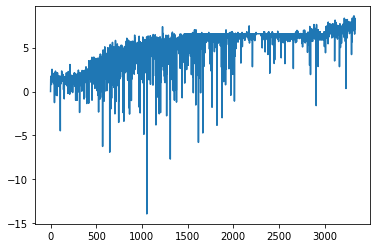

In [6]:
plt.plot(env.total_reward)
plt.show()

### Run simulation

In [7]:
# Reset environment for simulation
state = env.reset()
done = False

# Graph data
inventory_levels = {}
for rw_id in env.simulation.get_regional_warehouses():
    inventory_levels[rw_id] = []
    
actions = {}
for rw_id in env.simulation.get_regional_warehouses():
    actions[rw_id] = []

# Run simulation with model
while not done:
    action, _states = ppo_model.predict(state)
    state, reward, done, info = env.step(action)
    
    # For Graph
    i = 1
    for inv in info["Inventory:"]:
        inventory_levels[i].append(inv)
        i += 1
        
    i = 1
    for act in info["Action:"]:
        actions[i].append(act)
        i += 1
    
    # print(env.simulation.print_state())
    for i in info:
        print(i, info[i], end=" | ")
    print()
    
print("\n", env.evaluation_parameters())

Steps left: 29 | Inventory: [12 11 10] | Action: [0 0 0] | Reward: 0.08 | 
Steps left: 28 | Inventory: [11  9  7] | Action: [0 0 0] | Reward: 0.1 | 
Steps left: 27 | Inventory: [10  7  4] | Action: [0 0 1] | Reward: 0.14 | 
Steps left: 26 | Inventory: [9 5 1] | Action: [0 0 0] | Reward: 0.26 | 
Steps left: 25 | Inventory: [8 3 6] | Action: [0 1 0] | Reward: 0.17 | 
Steps left: 24 | Inventory: [7 1 3] | Action: [0 0 1] | Reward: 0.29 | 
Steps left: 23 | Inventory: [6 7 0] | Action: [0 0 0] | Reward: 0.42 | 
Steps left: 22 | Inventory: [5 5 5] | Action: [0 0 1] | Reward: 0.17 | 
Steps left: 21 | Inventory: [4 3 2] | Action: [0 1 0] | Reward: 0.26 | 
Steps left: 20 | Inventory: [3 1 7] | Action: [0 0 0] | Reward: 0.29 | 
Steps left: 19 | Inventory: [2 7 4] | Action: [0 0 1] | Reward: 0.22 | 
Steps left: 18 | Inventory: [1 5 1] | Action: [1 0 0] | Reward: 0.39 | 
Steps left: 17 | Inventory: [0 3 6] | Action: [0 1 0] | Reward: 0.46 | 
Steps left: 16 | Inventory: [7 1 3] | Action: [0 0 1] | 

###### Inventory level graph

Regional warehouse 1
[12, 11, 10, 9, 8, 7, 6, 5, 4, 3, 2, 1, 0, 7, 6, 5, 4, 3, 2, 1, 0, 7, 6, 5, 4, 3, 2, 1, 0, 7]
act: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0]


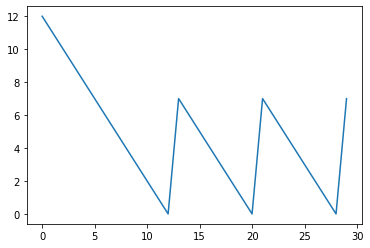

Regional warehouse 2
[11, 9, 7, 5, 3, 1, 7, 5, 3, 1, 7, 5, 3, 1, 7, 5, 3, 9, 15, 13, 11, 9, 7, 5, 3, 1, 7, 5, 3, 1]
act: [0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0]


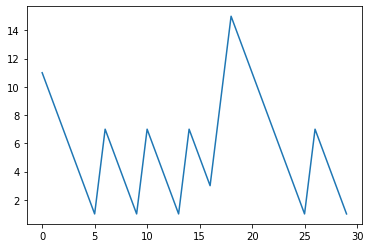

Regional warehouse 3
[10, 7, 4, 1, 6, 3, 0, 5, 2, 7, 4, 1, 6, 3, 0, 5, 2, 7, 4, 1, 6, 3, 0, 5, 2, 7, 4, 1, 6, 3]
act: [0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1]


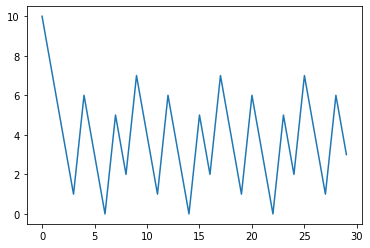

In [8]:
for rw_id in inventory_levels:
    print("Regional warehouse", rw_id)
    print(inventory_levels[rw_id])
    print("act:", actions[rw_id])
    plt.plot(inventory_levels[rw_id])
    plt.show()